# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [104]:
# Checking the number of mice.
full_mouse_count = full_data["Mouse ID"].unique()
len(full_mouse_count)

249

In [105]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
full_data["Mouse ID"].value_counts()

g989    13
j119    10
b742    10
m269    10
i177    10
        ..
o848     1
l872     1
h428     1
d133     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [106]:
# Optional: Get all the data for the duplicate mouse ID. 

In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = full_data[full_data["Mouse ID"] != "g989"]
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [108]:
# Checking the number of mice in the clean DataFrame.
mouse_count = data["Mouse ID"].unique()
len(mouse_count)

248

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = data.groupby("Drug Regimen")
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_data["Tumor Volume (mm3)"].var()
tumor_volume_standard_deviation = grouped_data["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_data["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                        "Median Tumor Volume": median_tumor_volume,
                        "Tumor Volume Variance": tumor_volume_variance,
                        "Tumor Volume Std. Dev.": tumor_volume_standard_deviation,
                        "Tumor Volume Std. Err.": tumor_volume_sem
                        })
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

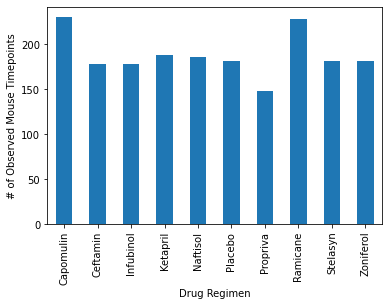

In [111]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoints = grouped_data["Timepoint"].count()

drug_timepoints_chart = drug_timepoints.plot(kind='bar')
drug_timepoints_chart.set_xlabel("Drug Regimen")
drug_timepoints_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

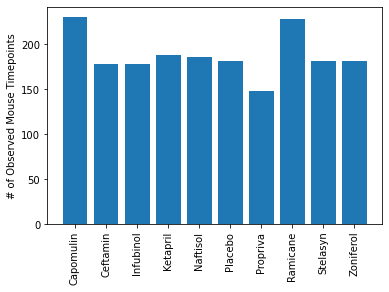

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(grouped_data))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_timepoints)
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                             "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

In [113]:
data["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [114]:
grouped_sex = data.groupby("Sex")
sex_counts = grouped_sex.count()

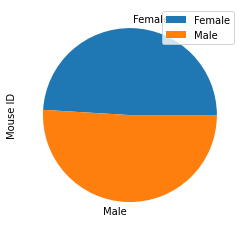

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = sex_counts.plot(kind="pie", y="Mouse ID")

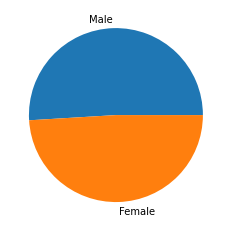

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
plt.pie(sizes, labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mice = data.groupby("Mouse ID")
last_timepoint = grouped_mice["Timepoint"].max()

ending = pd.DataFrame({"Timepoint": last_timepoint})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ending_times = pd.merge(ending, full_data, on=["Mouse ID", "Timepoint"])
ending_times

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
ending_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds

In [177]:
# Struggled with for loops, so made a new dataframe instead
capomulin = ending_times[ending_times["Drug Regimen"] == ("Capomulin")]
ramicane = ending_times[ending_times["Drug Regimen"] == ("Ramicane")]
infubinol = ending_times[ending_times["Drug Regimen"] == ("Infubinol")]
ceftamin = ending_times[ending_times["Drug Regimen"] == ("Ceftamin")]

merge_one = pd.merge(capomulin, ramicane, how="outer")
merge_two = pd.merge(infubinol, ceftamin, how="outer")

four_drugs = pd.merge(merge_one, merge_two, how="outer")
four_drugs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


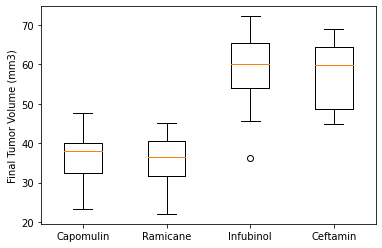

In [178]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_volumes = capomulin["Tumor Volume (mm3)"]
ramicane_volumes = ramicane["Tumor Volume (mm3)"]
infubinol_volumes = infubinol["Tumor Volume (mm3)"]
ceftamin_volumes = ceftamin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes])
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

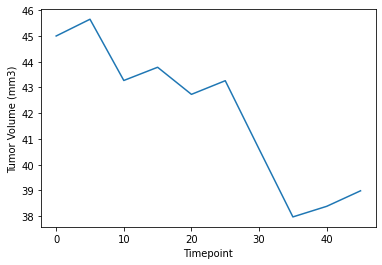

In [190]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_mouse = full_data.loc[full_data["Mouse ID"] == "b128"]
one_mouse = one_mouse.set_index("Timepoint")
one_mouse = one_mouse["Tumor Volume (mm3)"]
one_line = one_mouse.plot(kind="line")
one_line.set_ylabel("Tumor Volume (mm3)")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

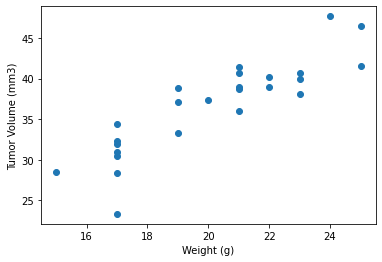

In [193]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

## Correlation and Regression

0.88

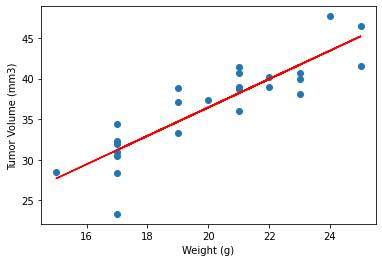

In [205]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
regress_values = capomulin["Weight (g)"] * slope + intercept
plt.plot(capomulin["Weight (g)"],regress_values,"r-")
plt.show
correlation = st.pearsonr(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
round(correlation[0],2)